In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

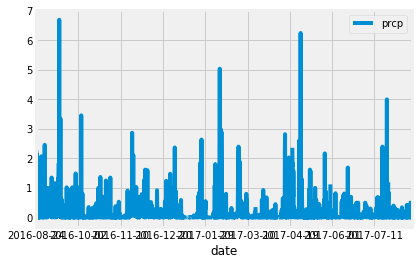

In [49]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#dataM=engine.execute("SELECT * FROM Measurement")

#for record in dataM:
    #print(record)
#dataS=engine.execute("SELECT * FROM Station")

#for record in dataS:
    #print(record)

#query for dates and find latest
#for column in Measurement.__table__.columns:
    #print(column)
latestDate = (session.query(Measurement.date)
                     .order_by(Measurement.date.desc())
                     .first())
latestDate

latestDate = list(np.ravel(latestDate))[0]
latestDate
latestDate = dt.datetime.strptime(latestDate, '%Y-%m-%d')

latestDate

latestYear = int(dt.datetime.strftime(latestDate, '%Y'))
latestMonth = int(dt.datetime.strftime(latestDate, '%m'))
latestDay = int(dt.datetime.strftime(latestDate, '%d'))

latestYear

latestMonth

latestDay

previousyear = dt.date(latestYear, latestMonth, latestDay) - dt.timedelta(days=365)
previousyear

oneyeardata=(session.query(Measurement.date, Measurement.prcp)
                  .filter(Measurement.date > previousyear)
                  .order_by(Measurement.date)
                  .all())
oneyeardata

oneyeardf=pd.DataFrame(oneyeardata)
oneyeardf.head()
oneyeardf=oneyeardf.set_index("date")
oneyeardf

oneyeardf=oneyeardf.sort_index(ascending=True)

oneyeardf.head()

oneyeardf.plot()
#query for dates and find latest


# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


![precipitation](Images/precipitation.png)

In [52]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summarystats=oneyeardf.describe()
summarystats

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [56]:
# Design a query to show how many stations are available in this dataset?


scount = session.query(Station).count()
scount

9

In [62]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

#query for the number of observations per station
activestations = (session.query(Measurement.station, func.count(Measurement.station))
                        .group_by(Measurement.station)
                        .order_by(func.count(Measurement.station).desc())
                        .all())
activestations
stationid=activestations[0][0]
mostactive = (session.query(Station.name).filter_by(station = stationid))
stationname=mostactive[0][0]
stationname


'WAIHEE 837.5, HI US'

In [74]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
lowesttemp = (session.query(Measurement.tobs)
                     .filter(Measurement.station == stationid)
                     .order_by(Measurement.tobs.asc())
                     .first())
lowesttemp = lowesttemp[0]
lowesttemp

highesttemp=(session.query(Measurement.tobs).filter(Measurement.station==stationid).order_by(Measurement.tobs.desc()).first())

highesttemp=highesttemp[0]
highesttemp

avgtemp = (session.query(func.avg(Measurement.tobs))
                  .filter(Measurement.station == stationid))
avgtemp=avgtemp[0][0]
avgtemp

71.66378066378067

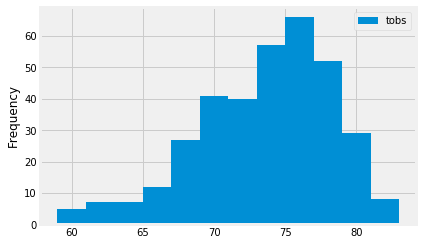

In [80]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tempdata = (session.query(Measurement.date, Measurement.tobs)
                   .filter(Measurement.date > previousyear)
                   .filter(Measurement.station == stationid)
                   .order_by(Measurement.date)
                   .all())
tempdata

tempdf=pd.DataFrame(tempdata)
tempdf.head()

tempdf.plot(kind="hist",bins=12)

![precipitation](Images/station-histogram.png)

In [79]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
